# 第一题：支持向量机的核函数

实验内容：

1. 了解核函数对SVM的影响
2. 绘制不同核函数的决策函数图像
3. 简述引入核函数的目的

## 1. 导入模型

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 引入数据集
from sklearn.datasets import make_moons
# 引入数据预处理工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 引入支持向量机分类器
from sklearn.svm import SVC

## 2. 生成数据

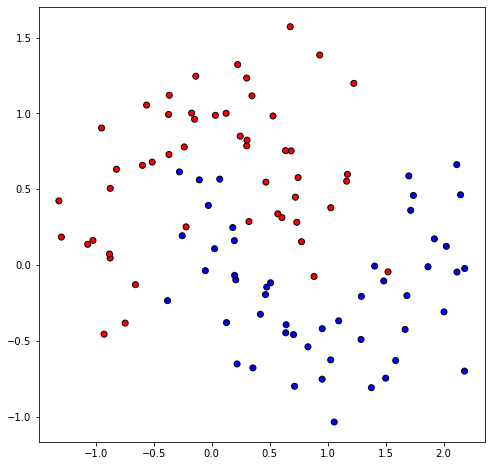

In [3]:
X, y = make_moons(n_samples = 100, noise = 0.3, random_state = 0)

plt.figure(figsize = (8, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cm_bright, edgecolors = 'k')

## 3. 数据预处理与划分
使用标准化，60%训练集，40%测试集，固定一个随机种子

In [6]:
# YOUR CODE HERE

x_tarin, x_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=32)
standard = StandardScaler()
standard.fit(x_tarin)
X_train = standard.transform(x_tarin)
X_test  = standard.transform(x_test)

训练集和测试集可视化

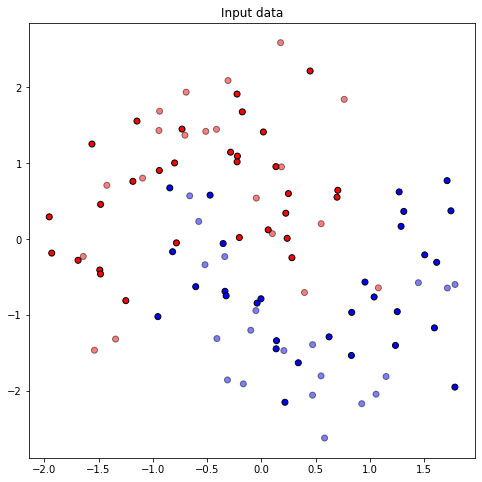

In [7]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize = (8, 8))
plt.title("Input data")
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors='k')

## 4. 样本到分离超平面距离的可视化

我们使用SVM模型里面的decision_function方法，可以获得样本到分离超平面的距离。

下面的函数将图的背景变成数据点，计算每个数据点到分离超平面的距离，映射到不同深浅的颜色上，绘制出了不同颜色的背景。

In [8]:
def plot_model(model, title):
    
    # 训练模型，计算精度
    # YOUR CODE HERE
    model.fit(X_train, y_train)


    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    # 将背景网格化
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 计算每个点到分离超平面的距离
    # YOUR CODE HERE
    Z = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.decision_function(Z).reshape(xx.shape)

    # 设置图的大小
    plt.figure(figsize = (14, 6))
    
    # 绘制训练集的子图
    plt.subplot(121)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)

    # 绘制训练集的样本
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # 设置图的上下左右界
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # 设置子图标题
    plt.title("training set")
    
    # 图的右下角写出在当前数据集中的精度
    plt.text(xx.max() - .3, yy.min() + .3, ('acc: %.3f' % score_train).lstrip('0'), size=15, horizontalalignment='right')
    
    plt.subplot(122)
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("testing set")

    plt.text(xx.max() - .3, yy.min() + .3, ('acc: %.3f' % score_test).lstrip('0'), size=15, horizontalalignment='right')

    plt.suptitle(title)

我们尝试绘制线性核的分类效果图

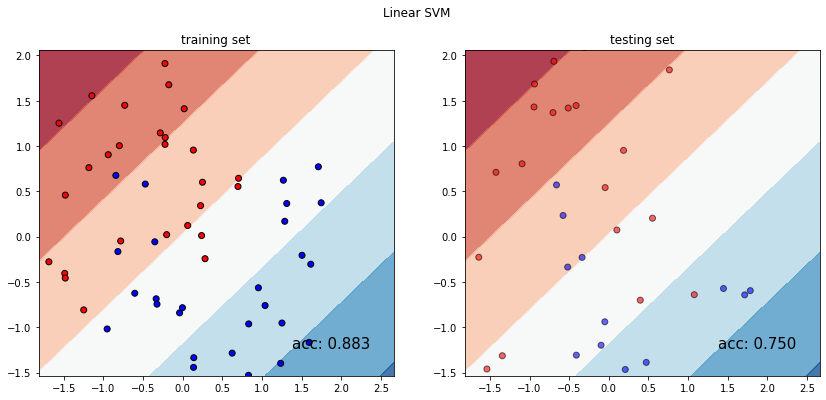

In [9]:
plot_model(SVC(kernel = "linear", probability = True), 'Linear SVM')

# 作业1：请你尝试使用其他的核函数，绘制分类效果图

## 1. 高斯核，又称径向基函数(Radial Basis Function)，指定kernel为"rbf"即可

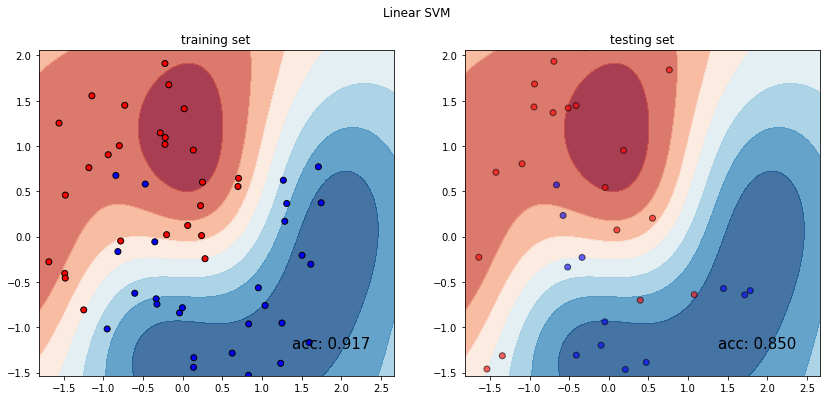

In [10]:
# YOUR CODE HERE
plot_model(SVC(kernel='rbf', probability=True), 'Linear SVM')

## 2. sigmoid核，指定kernel为"sigmoid"即可

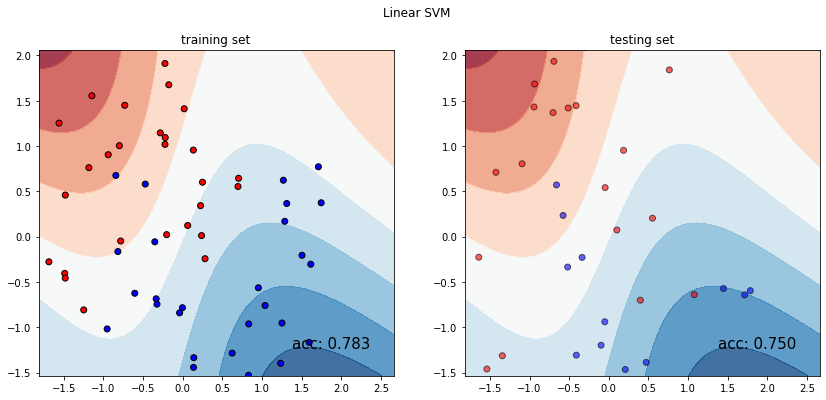

In [11]:
# YOUR CODE HERE
plot_model(SVC(kernel='sigmoid', probability=True), 'Linear SVM')

## 3. 多项式核，指定kernel为"poly"即可

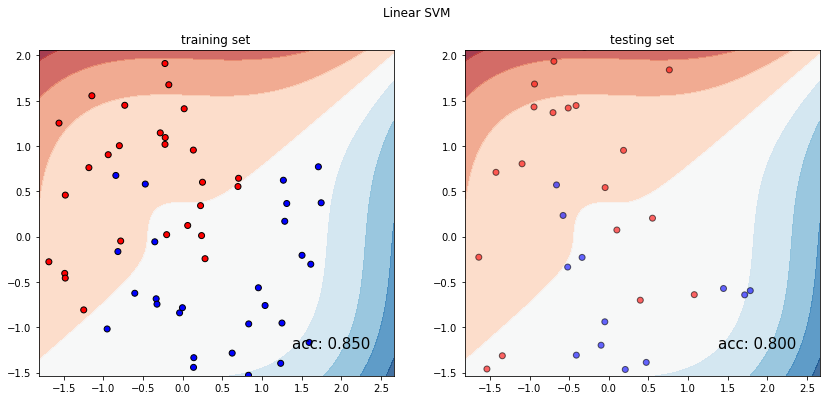

In [14]:
# YOUR CODE HERE
plot_model(SVC(kernel='poly', probability= True), "Linear SVM")

# 作业2：简述为什么要引入核函数？

答：实际研究中，会有一些样例在当前维度不可区分的情况，这时候我们通过映射函数进行升维。在这样的一个希尔伯特空间子集中我们可以进行区分，但是同时需要计算样本的内积，这样计算量过于大，这样就引入了核函数，用低维的计算结果等价于映射到高维时向量点积的值，从而用比较小的计算量完成了升维。

# 第二题：支持向量机的软间隔

实验内容：

1. 了解分离超平面、间隔超平面与支持向量的绘制
2. 调整C的值，绘制分离超平面、间隔超平面和支持向量
3. 简述引入软间隔的原因，以及C值对SVM的影响

## 1. 导入模型

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

## 2. 制造数据集

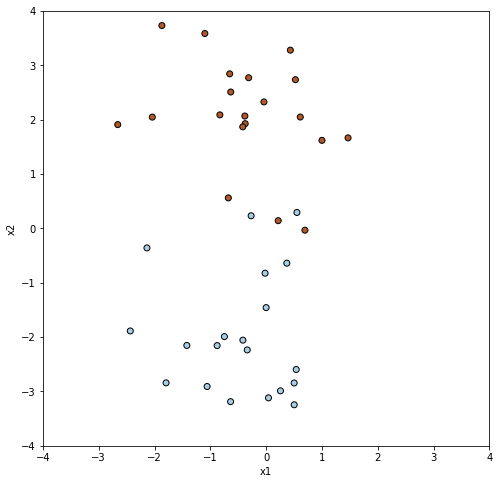

In [17]:
np.random.seed(2)
X = np.r_[np.random.randn(20, 2) - [0, 2], np.random.randn(20, 2) + [0, 2]]
Y = [0] * 20 + [1] * 20

def plot_data(X, Y):
    # 新建一个 8 × 8 的图
    plt.figure(figsize = (8, 8))

    # 绘制散点图
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Paired, edgecolors = 'k')

    # 设置横纵坐标标签
    plt.xlabel('x1')
    plt.ylabel('x2')

    # 设定图的范围
    plt.xlim((-4, 4))
    plt.ylim((-4, 4))

plot_data(X, Y)

## 3. 训练模型

这里我们使用线性核函数，C设定为100

In [18]:
# 创建模型
clf = SVC(kernel = 'linear', C = 100, random_state = 32)
# 训练模型
clf.fit(X, Y)

SVC(C=100, kernel='linear', random_state=32)

## 4. 绘制超平面

在二维平面中，我们将SVM参数写为$w_0$和$w_1$，截距为$b$。

超平面方程为：

$$
w^{\mathrm{T}} x + b = 0
$$

写成分量形式为：

$$
w_0 x_1 + w_1 x_2 + b = 0
$$

等价于：

$$
x_2 = - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

所以我们可以在上面的图中，绘制这个分离超平面，上图中，纵坐标为$x_2$，横坐标为$x_1$，我们可以通过SVC的coef_属性获取$w$，通过intercept_获取$b$。

画图的时候我们可以给定任意两点，如x1等于-5和5的点，计算出这两个点的x2值，然后通过连线的方式，绘制出超平面

In [19]:
def compute_hyperplane(model, x1):
    '''
    计算二维平面上的分离超平面，
    我们通过w0，w1，b以及x1计算出x2，只不过这里的x1是一个ndarray，x2也是一个ndarray
    
    Parameters
    ----------
    model: sklearn中svm的模型
    
    x1: numpy.ndarray，如[-5, 5]，表示超平面上这些点的横坐标
    
    Returns
    ----------
    x2: numpy.ndarray, 对应的纵坐标
    
    '''
    w0 = model.coef_[0][0]
    w1 = model.coef_[0][1]
    b = model.intercept_[0]
    
    # YOUR CODE HERE
    x2 = -w0 * x1/ w1 - b/w1
    
    return x2

In [20]:
# 测试样例
x1t = np.array([-5, 5])
x2t = compute_hyperplane(clf, x1t)
print(x2t) # [ 2.05713424 -2.27000147]

[ 2.05713424 -2.27000147]


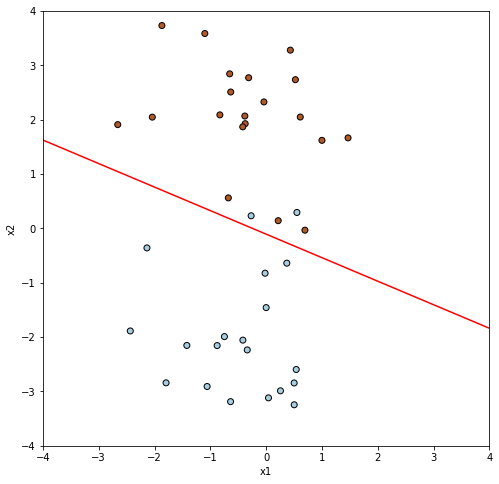

In [21]:
# 绘制数据
plot_data(X, Y)
# 在横坐标上选两个点
x1 = np.array([-5, 5])
# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)
# 绘制这两点连成的直线
plt.plot(x1, x2, '-', color = 'red')

## 5. 绘制间隔

根据SVM的原理，间隔超平面的方程是：

$$
w^{\mathrm{T}}x + b = \pm 1
$$

我们先讨论右侧为1的情况：

$$
w^{\mathrm{T}}x + b = 1
$$

写成分量形式：

$$
w_0 x_1 + w_1 x_2 + b = 1
$$

根据上面第四节的变换，可以得到：

$$
x2 = \frac{1}{w_1} - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

同理，当右侧为-1时，可得：

$$
x2 = - \frac{1}{w_1} - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

**可以发现，间隔超平面的方程就是在分离超平面上增加或减去$\frac{1}{w_1}$**

In [22]:
def compute_margin(model, x1):
    '''
    计算二维平面上的间隔超平面，
    我们通过w0，w1，b以及x1计算出x2，只不过这里的x1是一个ndarray，x2也是一个ndarray
    
    Parameters
    ----------
    model: sklearn中svm的模型
    
    x1: numpy.ndarray，如[-5, 5]，表示超平面上这些点的横坐标
    
    Returns
    ----------
    x2_up: numpy.ndarray, 一条间隔超平面上对应的纵坐标
    
    x2_down: numpy.ndarray, 另一条间隔超平面上对应的纵坐标
    
    '''
    
    # 先调用compute_hyperplane计算超平面的纵坐标
    x2 = compute_hyperplane(model, x1)
    
    w1 = model.coef_[0][1]
    
    # YOUR CODE HERE
    x2_up = 1/w1 + x2
    
    # YOUR CODE HERE
    x2_down = -1/w1 + x2
    
    return x2_up, x2_down

In [23]:
# 测试样例
x1t = np.array([-5, 5])
x2_upt, x2_downt = compute_margin(clf, x1t)
print(x2_upt)     # [ 2.43100836 -1.89612735]
print(x2_downt)   # [ 1.68326012 -2.64387559]

[ 2.43100836 -1.89612735]
[ 1.68326012 -2.64387559]


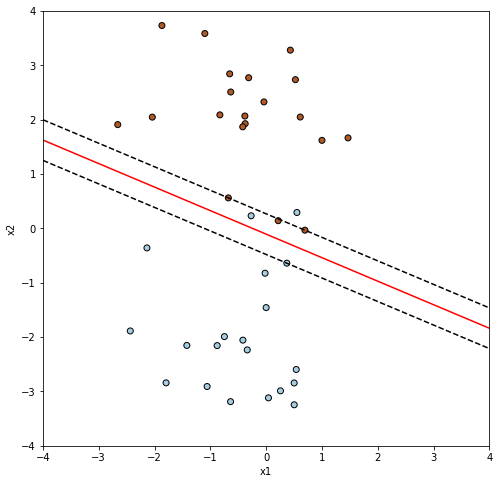

In [24]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

## 6. 标出支持向量

模型的support_vectors_属性包含了支持向量

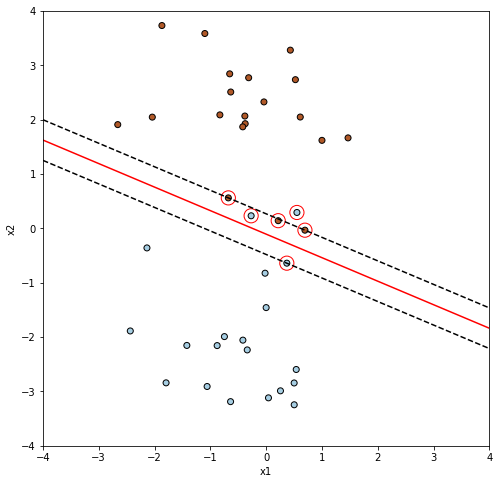

In [25]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

# 标出支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 200, facecolors = 'none', edgecolors = 'red')

# 作业1：请你使用线性核，调整C的值，绘制数据集，SVM分离超平面，间隔超平面以及支持向量

## 1. C = 10

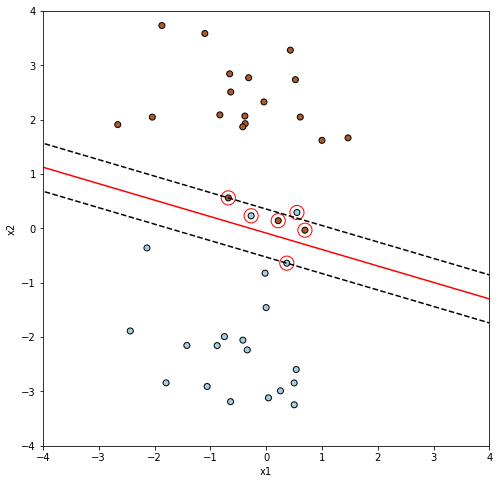

In [26]:
# YOUR CODE HERE
clf = SVC(kernel='linear', C=10, random_state=32)
clf.fit(X, Y)
plot_data(X,Y)
x1 = np.array([-5, 5])

x2 = compute_hyperplane(clf, x1)

x2_up, x2_down = compute_margin(clf, x1)

plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='red')

## 2. C = 1

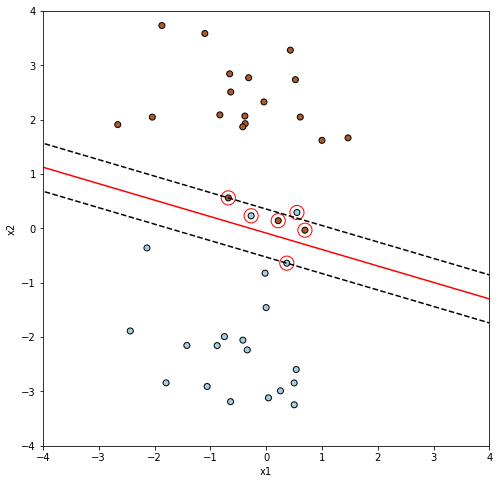

In [27]:
# YOUR CODE HERE
clf1 = SVC(kernel='linear', C=1, random_state=32)
clf.fit(X, Y)
plot_data(X,Y)
x1 = np.array([-5, 5])

x2 = compute_hyperplane(clf, x1)

x2_up, x2_down = compute_margin(clf, x1)

plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='red')

## 3. C = 0.1

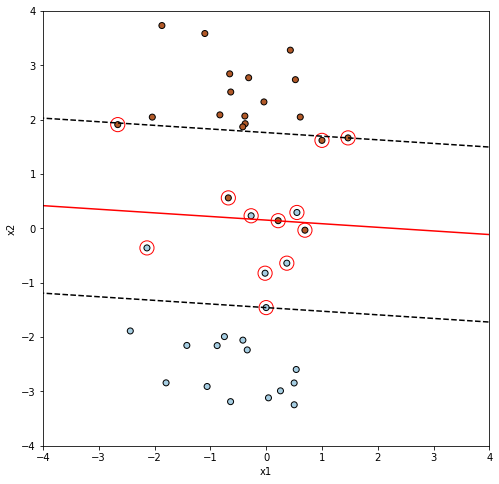

In [28]:
# YOUR CODE HERE
clf = SVC(kernel='linear', C=0.1, random_state=32)
clf.fit(X, Y)
plot_data(X,Y)
x1 = np.array([-5, 5])

x2 = compute_hyperplane(clf, x1)

x2_up, x2_down = compute_margin(clf, x1)

plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='red')

# 作业2：简述为什么要加入软间隔？C的值对SVM有什么影响？

答：
1. ，在实际应用中，我们得到的数据并不总是完美的线性可分的，其中可能会有个别噪声点，他们错误的被分类到了其他类中。如果将这些特异的噪点去除后，可以很容易的线性可分。但是，我们对于数据集中哪些是噪声点却是不知道的，如果以之前的方法进行求解，会无法进行线性分开。我们为了在实际情况中，即使有噪声点也可以划分超平面，于是引入了超平面。其实是一种工程上的trade off，我们理论上证明了一定可以找到完美可分的高维空间，但是工程上不一定划算，同时还要考虑泛化误差。
2. 用C来对离群值的影响进行量化，C越大表明离群点对目标函数影响越大，而我们不希望超平面分离出更多的离群点，就需要平衡好C的数值大小。

# 第三题：垃圾邮件分类

实验内容：
- 对于垃圾邮件分类任务：
 - 将数据集按照7：3划分，使用支持向量机完成分类，计算测试集的精度，查准率，查全率，F1值
 - 至少变换两个参数（例如核函数和C值），分析不同参数对结果的影响，填写下面表格。



> 表格见下方

## 垃圾邮件分类任务

In [30]:
# 导入数据
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
# YOUR CODE HERE
spambase = np.loadtxt('../data/spambase/spambase.data', delimiter = ",")
# print(spambase.shape)
spamx = spambase[:, :57]
spamy = spambase[:, 57]
# 数据集预处理及分割
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(spamx, spamy, train_size=0.6,random_state=32)

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

**注意：计算线性核的时候，可使用 LinearSVC 这个类。LinearSVC不需要设置kernel参数！**

In [33]:
# 引入模型
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import pandas as pd

In [34]:
# 所有模型统一固定一个随机种子
# YOUR CODE HERE
random_seed = 32
model_ls = ['rbf', 'rbf', 'linear', 'linear', 'sigmoid', 'sigmoid']
c_ls = [0.1, 1, 0.1, 1, 0.1, 1]
result_data = []
for model, c in zip(model_ls, c_ls):

    clf = SVC(kernel=model, C=c, random_state=random_seed)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    recall= recall_score(y_test, y_hat)
    f1 = f1_score(y_test, y_hat)
    result = [model, c, acc, precision, recall, f1]
    result_data.append(result)
column = ['kernel', 'C', 'acc', 'precision', 'recall', 'f1']
pd.DataFrame(data=result_data, columns=column)

,kernel,C,acc,precision,recall,f1
0,rbf,0.1,0.903313,0.936275,0.804775,0.865559
1,rbf,1.0,0.927757,0.931446,0.877809,0.903832
2,linear,0.1,0.921238,0.910275,0.883427,0.896650
3,linear,1.0,0.928843,0.917986,0.896067,0.906894
4,sigmoid,0.1,0.883759,0.895238,0.792135,0.840537
5,sigmoid,1.0,0.888647,0.875556,0.830056,0.852199


# 第四题：Advertising广告预测任务

实验内容：
1. 使用支持向量机完成Advertising广告预测问题
2. 使用十折交叉验证训练模型，计算测试集的MAE和RMSE
3. 至少变换两个参数（例如核函数和C值），分析不同参数对结果的影响。

> 表格见下方

## 广告预测任务

In [35]:
# 导入数据
import numpy as np
# YOUR CODE HERE
import pandas as pd
data = pd.read_csv(r'../data/advertising/advertising.csv')
data.dropna(axis = 1, inplace = True)
features = data.columns.tolist()
target = 'Sales'
features.remove(target)
X_train = data[features]
y_train = data['Sales']
# 数据集预处理及分割
# YOUR CODE HERE
standard_advertising = StandardScaler()
X_train = standard_advertising.fit_transform(X_train)

In [38]:
# 引入模型
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
model_ls = ['rbf', 'rbf', 'linear', 'linear', 'sigmoid', 'sigmoid']
c_ls = [0.1, 1, 0.1, 1, 0.1, 1]
result_data = []
for model, c in zip(model_ls, c_ls):
    clf = SVR(kernel=model, C=c)
    y_hat = cross_val_predict(clf, X_train, y_train, cv=10)
    mae = mean_absolute_error(y_train, y_hat)
    rmse = np.sqrt(mean_squared_error(y_train, y_hat))
    result = [model, c, mae, rmse]
    result_data.append(result)
column = ['kernel', 'C', 'mae', 'rmse']
pd.DataFrame(data=result_data, columns=column)

,kernel,C,mae,rmse
0,rbf,0.1,2.934183,3.825761
1,rbf,1.0,1.502624,2.055126
2,linear,0.1,1.310699,1.757333
3,linear,1.0,1.257268,1.686829
4,sigmoid,0.1,2.012458,2.631931
5,sigmoid,1.0,3.164743,4.435449
